## Libs Utilizadas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Análise de informações da Covid

Fontes de dados e estudos utilizados:

https://www.google.com/search?client=opera-gx&q=casos+de+covid+no+brasil&sourceid=opera&ie=UTF-8&oe=UTF-8

https://pt.wikipedia.org/wiki/Peste_Negra

https://brasil.io/dataset/covid19/caso_full/

https://www.gov.br/saude/pt-br/vacinacao

https://www.worldometers.info/coronavirus/

### Leitura e Verificação dos Dados

In [2]:
df_state = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid_Group_State.csv')
df_region = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid_Region_Group.csv')
df_city = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid_City.csv')
df_world = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados_Mundiais_Full.csv')

In [3]:
df_state = df_state.drop(columns='Porcentagem_Populacao_Obito')
df_state['Porcentagem_Vacinados'] = (df_state['Vacinados_Totais']/df_state['Populacao_Estimada'])*100 
df_state.head()

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
0,AC,894470,9.77,87389,1804,0.20,2.06,10,0,599142,Norte,66.982906
1,AL,3351543,6.50,217975,5379,0.16,2.47,745,19,2243282,Nordeste,66.932813
2,AM,4207714,9.99,420524,13605,0.32,3.18,350,9,2582892,Norte,61.384685
3,AP,861773,14.05,121076,1905,0.22,1.57,114,3,469928,Norte,54.530369
4,BA,14930634,7.98,1190992,25674,0.17,2.16,5553,170,9972163,Nordeste,66.789950


In [4]:
df_world = df_world.drop(columns='Unnamed: 0')
df_world.head()

,Pais,Confirmadors,Novos_Confirmados,Obitos,Novos_Obitos,Recuperados,Novos_Recuperados,Casos_Ativos,Total_Testes,Populacao
0,USA,"37,886,998","131,138","640,073",855,"30,289,281","55,367","6,957,644","559,519,820","333,188,423"
1,India,"32,285,101","35,201","432,552",440,"31,478,405","37,145","374,144","496,629,524","1,395,272,151"
2,Brazil,"20,417,204","38,218","570,718","1,137","19,313,546","57,619","532,940","56,023,684","214,260,563"
3,Russia,"6,642,559","20,958","172,110",805,"5,918,324","18,407","552,125","172,800,000","146,004,991"
4,France,"6,504,978","28,114","112,864",111,"5,941,296","27,837","450,818","111,773,788","65,436,259"


In [5]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   state                             27 non-null     object 
 1   Populacao_Estimada                27 non-null     int64  
 2   Porcentagem_Populacao_Confirmado  27 non-null     float64
 3   Confirmados_Acumulado             27 non-null     int64  
 4   Obitos_Acumulados                 27 non-null     int64  
 5   Taxa_Mortalidade                  27 non-null     float64
 6   Taxa_Letalidade                   27 non-null     float64
 7   Confirmacao_Dia                   27 non-null     int64  
 8   Obitos_Dia                        27 non-null     int64  
 9   Vacinados_Totais                  27 non-null     int64  
 10  Regiao                            27 non-null     object 
 11  Porcentagem_Vacinados             27 non-null     float64
dtypes: float64

In [6]:
df_state.isna().sum()

state                               0
Populacao_Estimada                  0
Porcentagem_Populacao_Confirmado    0
Confirmados_Acumulado               0
Obitos_Acumulados                   0
Taxa_Mortalidade                    0
Taxa_Letalidade                     0
Confirmacao_Dia                     0
Obitos_Dia                          0
Vacinados_Totais                    0
Regiao                              0
Porcentagem_Vacinados               0
dtype: int64

### Dados dos Estados

In [7]:
df_state.describe()

,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Porcentagem_Vacinados
count,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000
mean,7.842803e+06,10.897407,7.376656e+05,20637.296296,0.257407,2.438519,1733.777778,56.333333,6.083536e+06,70.890134
std,9.316952e+06,3.423060,8.113752e+05,27939.662012,0.064366,0.582645,2663.914158,94.851301,8.814237e+06,12.116282
min,6.311810e+05,4.780000,8.738900e+04,1804.000000,0.140000,1.560000,10.000000,0.000000,3.380400e+05,52.504256
25%,2.932272e+06,8.520000,2.945825e+05,6612.500000,0.205000,2.135000,238.000000,5.500000,2.223620e+06,64.390693
50%,4.064052e+06,10.530000,4.556820e+05,12019.000000,0.260000,2.470000,703.000000,13.000000,2.977997e+06,67.163536
75%,9.401862e+06,13.460000,9.956610e+05,22514.500000,0.310000,2.705000,1735.000000,37.500000,5.995620e+06,75.855697
max,4.628933e+07,19.170000,4.138421e+06,141664.000000,0.370000,4.200000,10449.000000,387.000000,4.539360e+07,98.064919


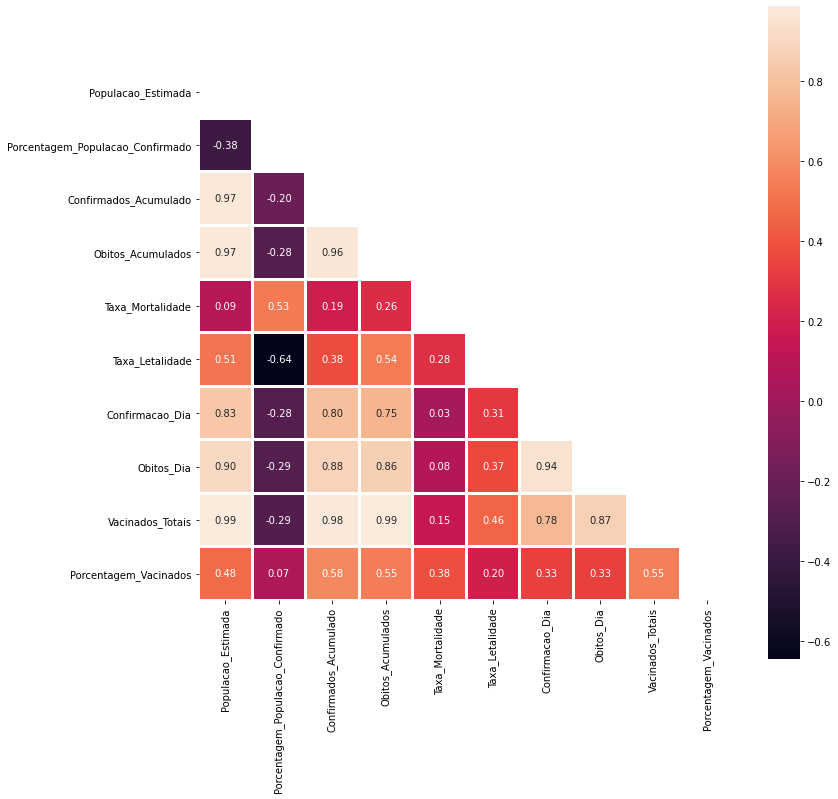

In [8]:
corr_matrix = df_state.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', 
            mask=mask, square=True, linewidths=2);

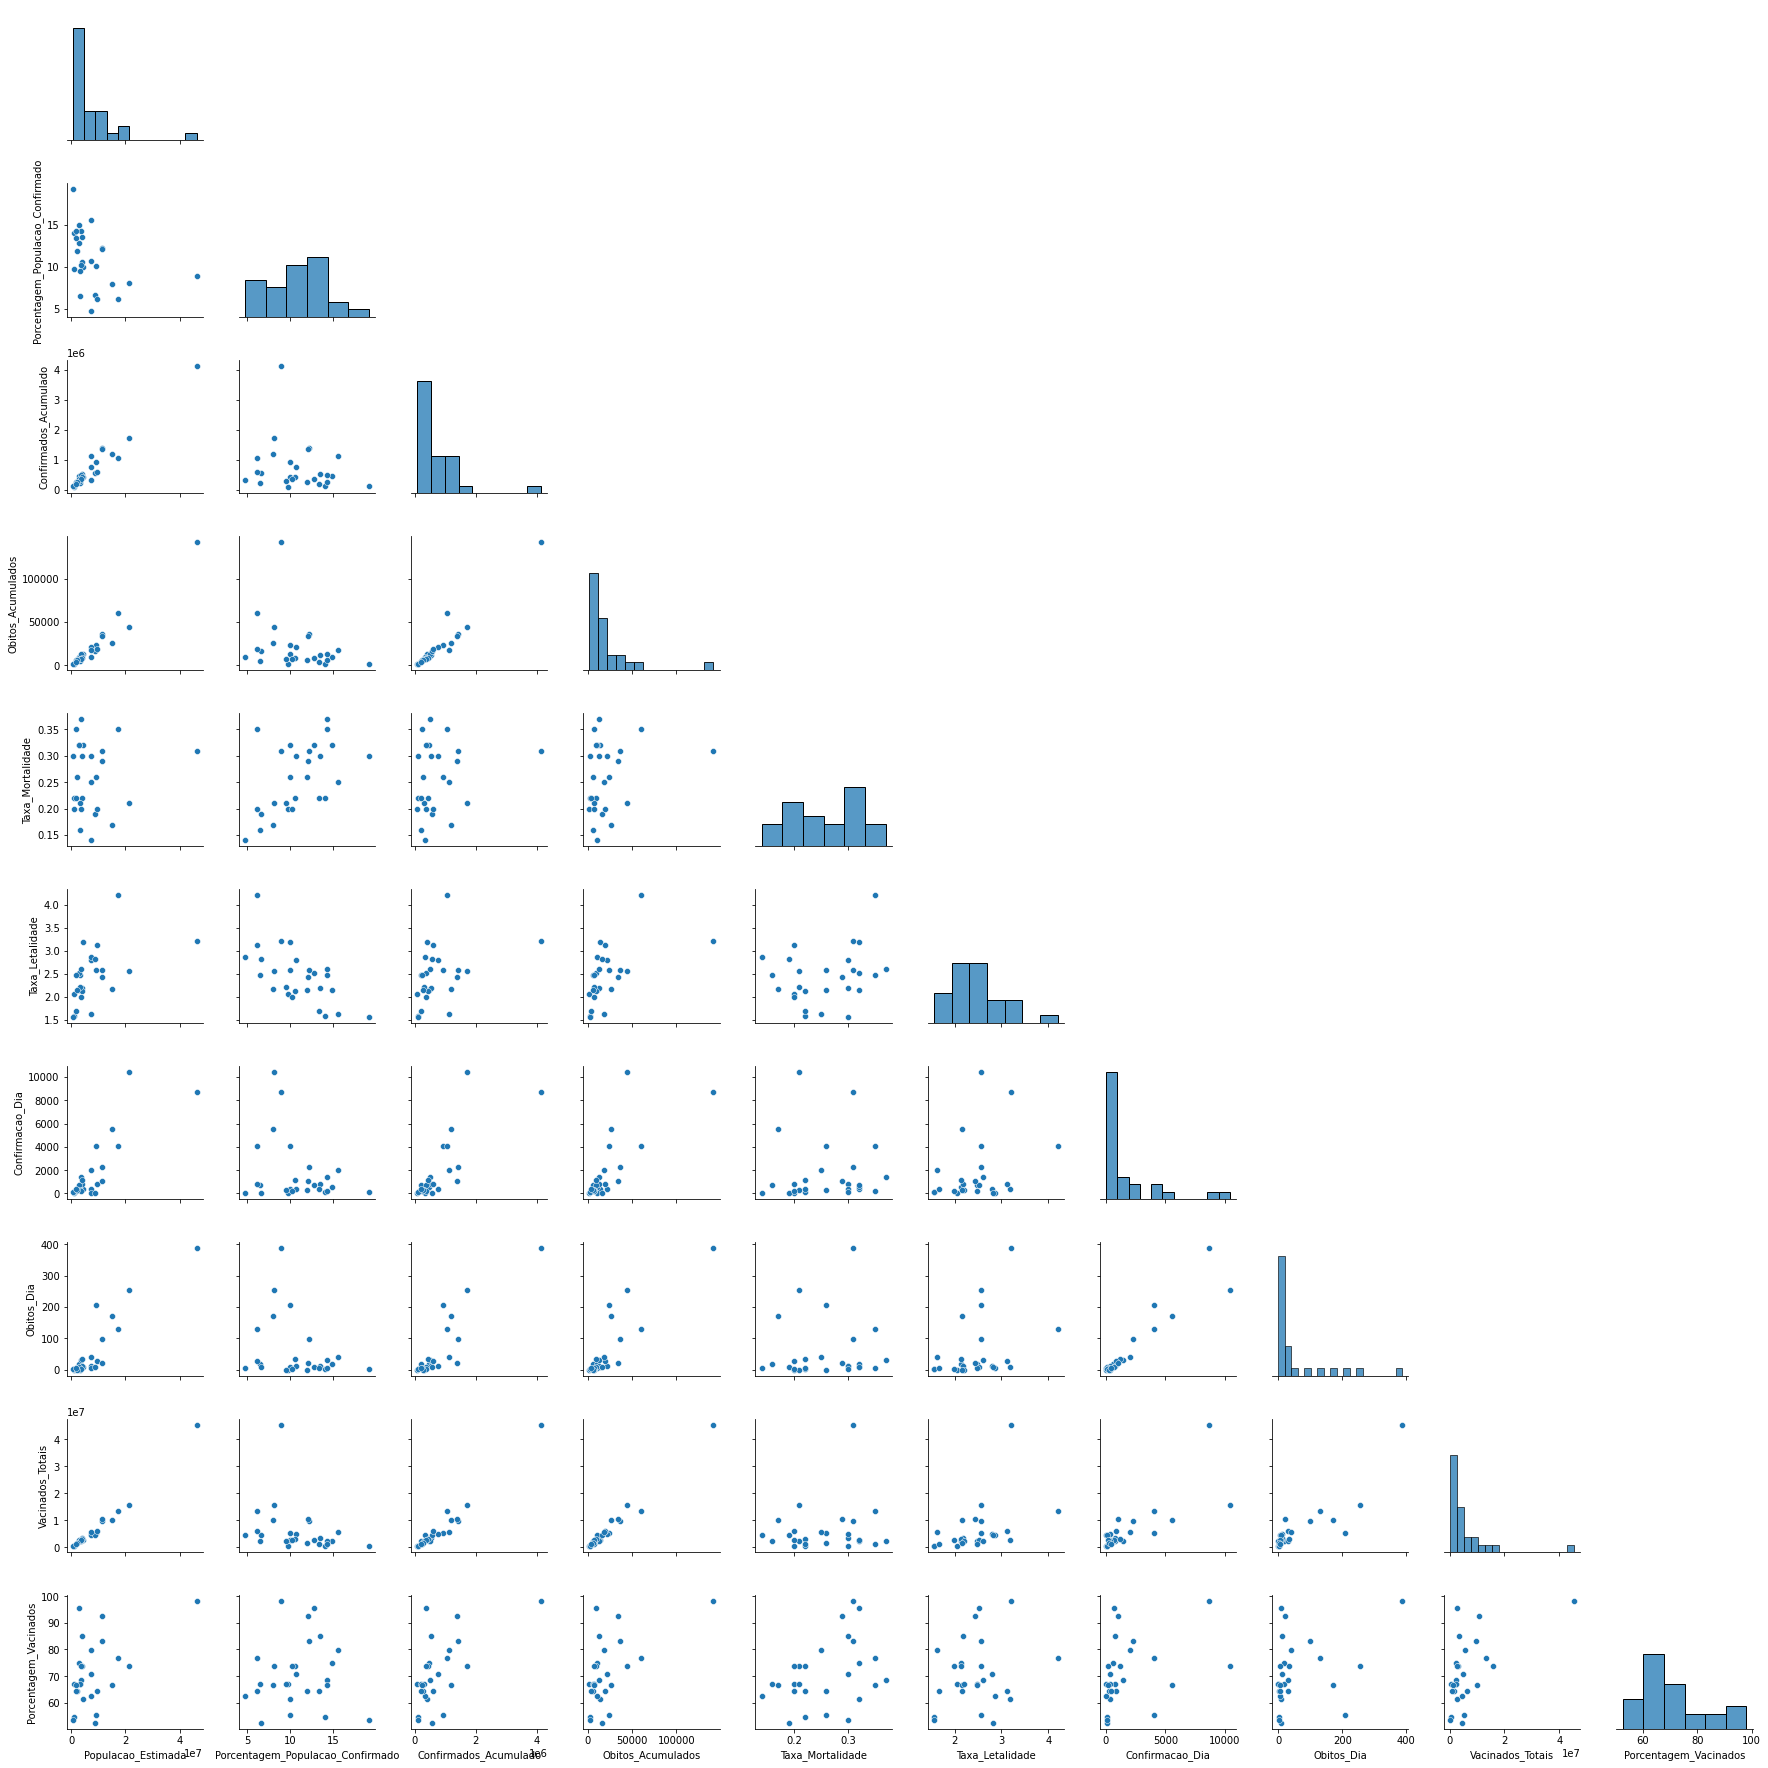

In [9]:
sns.pairplot(df_state, corner=True);

#### Informações mais Relevantes

Foram adicionadas algumas novas métricas nas informações gerais referentes aos estados.

Para isso foram utilizados esses sites para consultar informações sobre conceitos de Epidemiologia.

https://coronavirus.saude.mg.gov.br/blog/81-taxa-de-mortalidade-da-covid-19

https://iris.paho.org/bitstream/handle/10665.2/52650/OPASWBRACOVID-1920110_por%20%281%29.pdf?sequence=1&isAllowed=y

In [10]:
(df_state.sort_values(by='Taxa_Letalidade', ascending=False)).head(5)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
18,RJ,17366189,6.15,1067809,60266,0.35,4.20,4037,130,13353460,Sudeste,76.893439
25,SP,46289333,8.94,4138421,141664,0.31,3.21,8701,387,45393597,Sudeste,98.064919
2,AM,4207714,9.99,420524,13605,0.32,3.18,350,9,2582892,Norte,61.384685
15,PE,9616621,6.21,597338,19101,0.20,3.12,825,29,6204802,Nordeste,64.521644
9,MA,7114598,4.78,340275,9740,0.14,2.86,19,5,4451195,Nordeste,62.564252


##### Casos e Óbitos Acumulados

Será feita uma análise sobre os casos e óbitos registrados para checar como esses dados impactaram os diversos estados do Brasil.

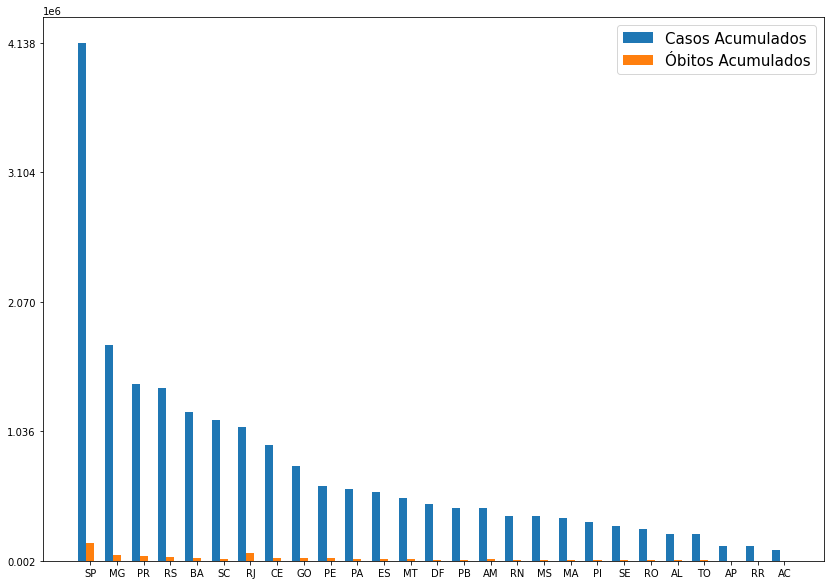

In [11]:
barWidth = 0.3

df_state_order = df_state.sort_values(by='Confirmados_Acumulado', ascending=False)

labels = [state for state in df_state_order['state']]
casos_acum = df_state_order['Confirmados_Acumulado']
obitos_acum = df_state_order['Obitos_Acumulados']

axis_y = np.linspace(min(obitos_acum), max(casos_acum), 5, endpoint=True)

r1 = np.arange(len(casos_acum))
r2 = [x+barWidth for x in r1]

plt.figure(figsize=(14,10))
plt.bar(r1, casos_acum, width=barWidth, label='Casos Acumulados')
plt.bar(r2, obitos_acum, width=barWidth, label='Óbitos Acumulados')

plt.xticks([r+barWidth for r in range(len(casos_acum))], labels);
plt.yticks(axis_y)

plt.legend(prop={'size': 15})
plt.show()

É possível destacar, claramente, que o estado de São Paulo é o foco da pandemia no Brasil, pois apresenta o maior número de casos confirmados, com um número significamente maior que o dos outros estados. Além disso, em decorrência desse número elevado de casos, também apresenta o maior número de mortes. Então, é necessário fazer um controle mais rigoroso sobre o fluxo de pessoas para evitar essa disseminação elevada, principalmente em São Paulo.

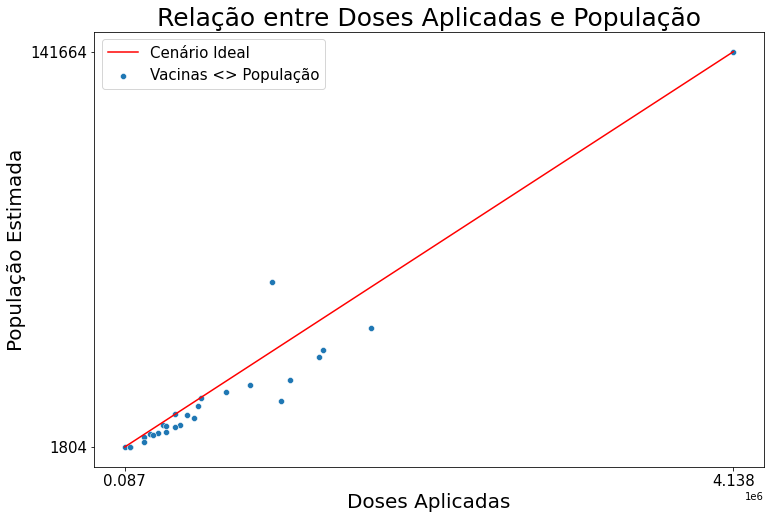

In [36]:
plt.figure(figsize=(12,8))
sns_t = sns.scatterplot(data=df_state, x='Confirmados_Acumulado', 
                        y='Obitos_Acumulados', label='Vacinas <> População')
plt.plot((min(df_state['Confirmados_Acumulado']), max(df_state['Confirmados_Acumulado'])), (min(df_state['Obitos_Acumulados']), max(df_state['Obitos_Acumulados'])), color='red', label='Cenário Ideal')
sns_t.axes.set_title("Relação entre Doses Aplicadas e População",fontsize=25)
sns_t.set_xlabel("Doses Aplicadas", size=20)
sns_t.set_ylabel("População Estimada", size=20)
sns_t.set_xticks([min(df_state['Confirmados_Acumulado']), max(df_state['Confirmados_Acumulado'])])
sns_t.set_yticks([min(df_state['Obitos_Acumulados']), max(df_state['Obitos_Acumulados'])])
sns_t.tick_params(labelsize=15)
plt.legend(prop={'size':15});

##### Taxa de Letalidade

Taxa de letalidade ou coeficiente de letalidade é a proporção entre o número de mortes por uma doença e o número total de doentes que estão acometidos, ao longo de um determinado período de tempo.

A Taxa de letalidade é calculada usando a seguinte fórmula:

$$\textrm{taxa de letalidade} = \frac{\textrm{Óbitos Acumulados}}{\textrm{Confirmados Acumulados}}$$

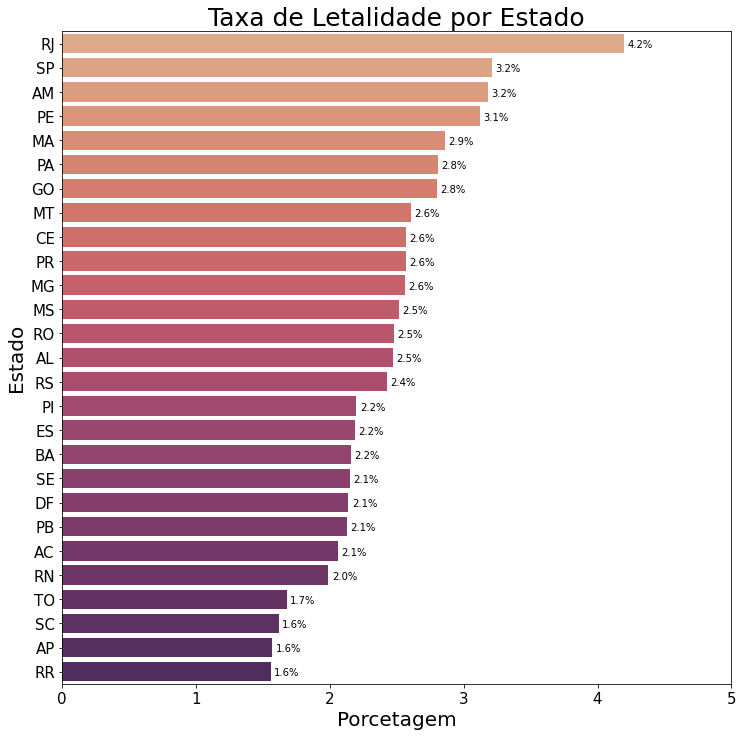

In [12]:
plt.figure(figsize=(12,12))
sns_t = sns.barplot(data=df_state.sort_values(by='Taxa_Letalidade', ascending=False), 
                    x='Taxa_Letalidade', y='state', palette='flare')

for p in sns_t.patches:
    width = p.get_width()
    plt.text(0.12+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.1f}%'.format(width),
             ha='center', va='center')

sns_t.axes.set_title("Taxa de Letalidade por Estado",fontsize=25)
sns_t.set_xlabel("Porcetagem", size=20)
sns_t.set_ylabel("Estado", size=20)
sns_t.set_xticks([0, 1, 2, 3, 4, 5])
sns_t.tick_params(labelsize=15);

Nesse gráfico conseguimos constatar que o Rio de Janeira apresenta a maior Taxa de Letalidade dentre todos os estados brasileiros. Tendo assim uma diferença de 2% para o segundo colocado, o que reflete que talvez seja necessário uma atenção especial do SUS desse estado ou as condições de tratamento dos pacientes, visto que é o local onde em que mais pessoas estão morrendo por causa do Covid-19.

In [13]:
(df_state.sort_values(by='Taxa_Letalidade', ascending=False)).head(3)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
18,RJ,17366189,6.15,1067809,60266,0.35,4.20,4037,130,13353460,Sudeste,76.893439
25,SP,46289333,8.94,4138421,141664,0.31,3.21,8701,387,45393597,Sudeste,98.064919
2,AM,4207714,9.99,420524,13605,0.32,3.18,350,9,2582892,Norte,61.384685


##### Taxa de Mortalidade

Esse indicador representa o número de óbitos ocorridos no período de um ano. Essa taxa é calculada a cada mil habitantes e reflete a relação entre o número de mortos anuais e a população total de um determinado lugar.

Podemos calcular a taxa de mortalidade usando a seguinte fórmula:

$$\textrm{taxa de mortalidade} = \frac{\textrm{Óbitos Acumulados}}{\textrm{População Estimada}}$$

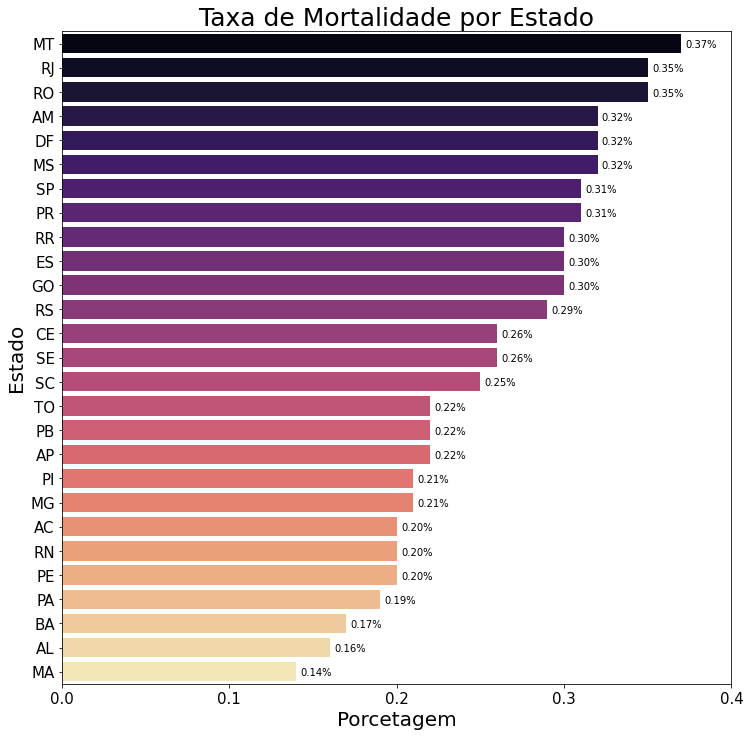

In [14]:
plt.figure(figsize=(12,12))
sns_t = sns.barplot(data=df_state.sort_values(by='Taxa_Mortalidade', ascending=False), 
                    x='Taxa_Mortalidade', y='state', palette='magma')

for p in sns_t.patches:
    width = p.get_width()
    plt.text(0.012+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

sns_t.axes.set_title("Taxa de Mortalidade por Estado",fontsize=25)
sns_t.set_xlabel("Porcetagem", size=20)
sns_t.set_ylabel("Estado", size=20)
sns_t.set_xticks([0, 0.1, 0.2, 0.3, 0.4])
sns_t.tick_params(labelsize=15);

Sobre a taxa de mortalidade é possível destacar que o estado que teve a maior parte da população afetada foi Mato Grosso, com 0,37% da população que veio a óbito por causa do Covid-19. Temos que essa taxa por mais que alta, felizmente não chegou perto dos 3% causado pelas Peste Negra em algumas cidades da Europa, na época em que ocorreu, pois em cenários modernos temos os benefícios do avanço da medicina para reduzir bastante a mortalidade de doenças.

In [15]:
df_state.sort_values(by='Taxa_Mortalidade', ascending=False).head(3)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
12,MT,3526220,14.24,501972,13087,0.37,2.61,1432,31,2416608,Centro-Oeste,68.532536
18,RJ,17366189,6.15,1067809,60266,0.35,4.20,4037,130,13353460,Sudeste,76.893439
20,RO,1796460,14.25,255914,6337,0.35,2.48,190,6,1197612,Norte,66.665108


##### População Infectada

O qual foi transmissível essa doença no contexto de casos acumulados por a população do estado:

$$\textrm{taxa de infecção} = \frac{\textrm{Casos Acumulados}}{\textrm{População Estimada}}$$

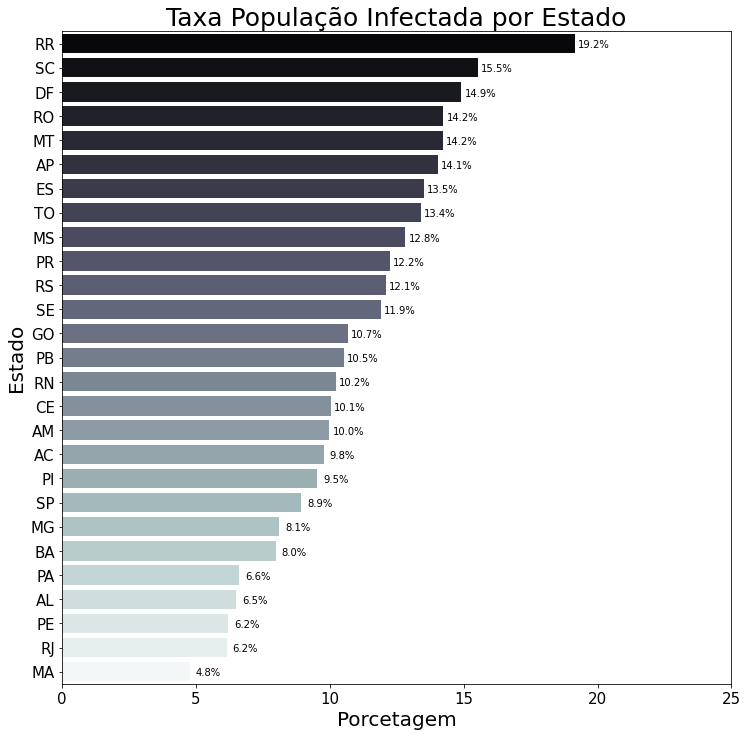

In [16]:
plt.figure(figsize=(12,12))
sns_t = sns.barplot(data=df_state.sort_values(by='Porcentagem_Populacao_Confirmado', ascending=False), 
                    x='Porcentagem_Populacao_Confirmado', y='state', palette='bone')

for p in sns_t.patches:
    width = p.get_width()
    plt.text(0.7+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.1f}%'.format(width),
             ha='center', va='center')

sns_t.axes.set_title("Taxa População Infectada por Estado",fontsize=25)
sns_t.set_xlabel("Porcetagem", size=20)
sns_t.set_xticks([0.0, 5.0, 10.0, 15.0, 20.0, 25.0])
sns_t.set_ylabel("Estado", size=20)
sns_t.tick_params(labelsize=15);

O estado que teve a maior confirmação de casos por população foi Roraima, apresentando 19.2%, o que é aproximadamente 4% maior que o segundo colocado. Roraima teve 121.012 casos confirmados de Covid-19.

In [17]:
df_state.sort_values(by='Porcentagem_Populacao_Confirmado', ascending=False).head(3)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
21,RR,631181,19.17,121012,1889,0.30,1.56,107,3,338040,Norte,53.556745
23,SC,7252502,15.53,1126670,18245,0.25,1.62,2038,41,5786439,Sul,79.785418
6,DF,3055149,14.92,455682,9741,0.32,2.14,594,18,2285800,Centro-Oeste,74.817955


##### Vacinação

Será realizada uma análise sobre a quantidade de doses da vacina aplicadas em cada estado.

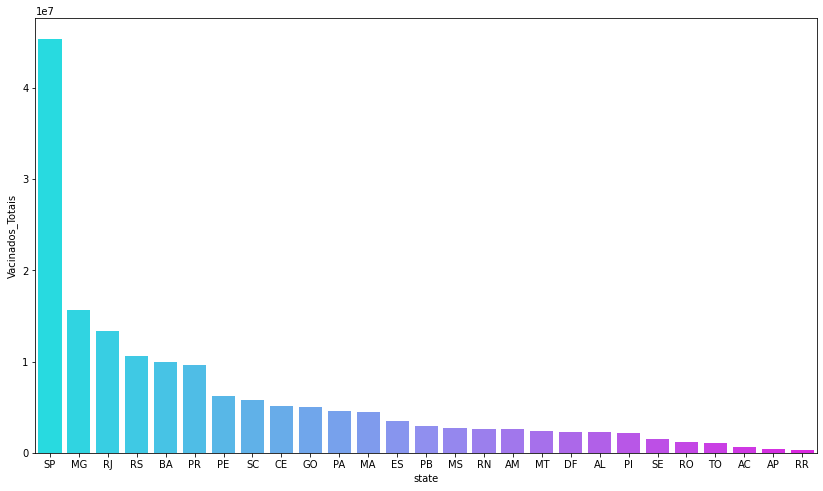

In [18]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_state.sort_values(by='Vacinados_Totais', ascending=False), 
            x='state', y='Vacinados_Totais', palette='cool');

Um insight interessante que é possível perceber é que a distribuição das vacinas está bem correlacionada com o número de casos confirmados, o que indica que estamos tendo um bom foco nessa imunização. Outro detalhe interessante é que o estado do Rio de Janeiro fica em 3° colocado nessa distribuição, apresentando um início de combate eficiente a alta taxa de letalidade observada no estado.

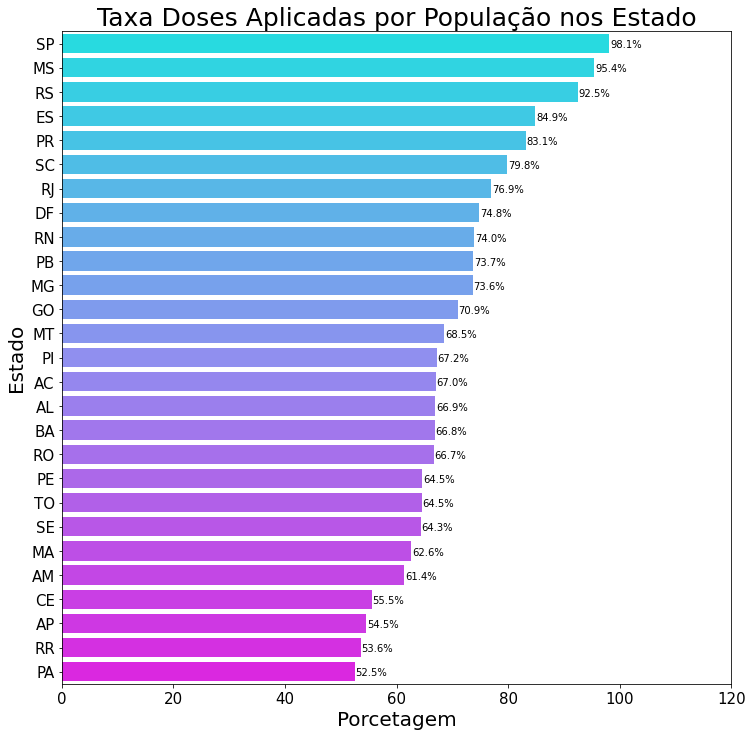

In [19]:
plt.figure(figsize=(12,12))
sns_t = sns.barplot(data=df_state.sort_values(by='Porcentagem_Vacinados', ascending=False), 
                    x='Porcentagem_Vacinados', y='state', palette='cool')

for p in sns_t.patches:
    width = p.get_width()
    plt.text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.1f}%'.format(width),
             ha='center', va='center')

sns_t.axes.set_title("Taxa Doses Aplicadas por População nos Estado",fontsize=25)
sns_t.set_xlabel("Porcetagem", size=20)
sns_t.set_xticks([0, 20, 40, 60, 80, 100, 120])
sns_t.set_ylabel("Estado", size=20);
sns_t.tick_params(labelsize=15)

Nesse gráfico é possível observar que alguns estados estão com uma ótima taxa de doses aplicadas por população, tendo destaque para o estado de São Paulo que apresenta a maior taxa, já que é o foco da pandemia. Entretanto, ainda temos alguns estados com porcetagem bem baixas. Assim, seria interessante dar uma atenção maior a eles.

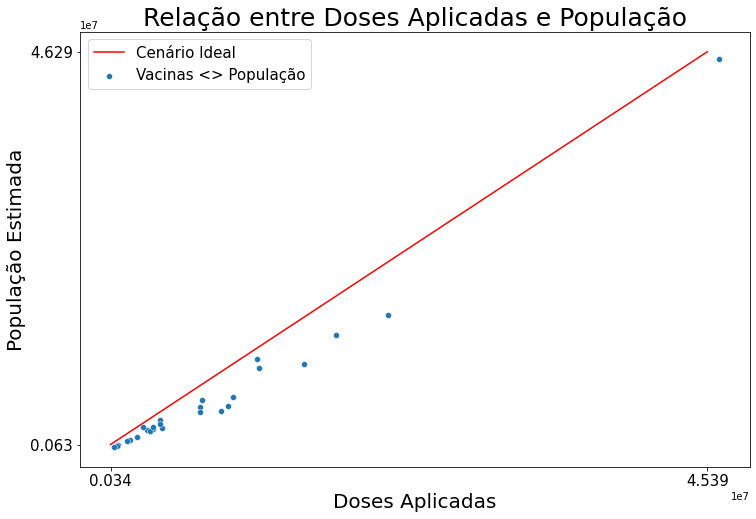

In [20]:
plt.figure(figsize=(12,8))
sns_t = sns.scatterplot(data=df_state, x='Populacao_Estimada', 
                        y=df_state['Vacinados_Totais'], label='Vacinas <> População')
plt.plot((min(df_state['Vacinados_Totais']), max(df_state['Vacinados_Totais'])), (min(df_state['Populacao_Estimada']), max(df_state['Populacao_Estimada'])), color='red', label='Cenário Ideal')
sns_t.axes.set_title("Relação entre Doses Aplicadas e População",fontsize=25)
sns_t.set_xlabel("Doses Aplicadas", size=20)
sns_t.set_ylabel("População Estimada", size=20)
sns_t.set_xticks([min(df_state['Vacinados_Totais']), max(df_state['Vacinados_Totais'])])
sns_t.set_yticks([min(df_state['Populacao_Estimada']), max(df_state['Populacao_Estimada'])])
sns_t.tick_params(labelsize=15)
plt.legend(prop={'size':15});

Nesse gráfico temos a relação entre as Doses Aplicadas e a População Estimada de cada estado, sendo a linha central a representação ideal de como deveria estar as doses aplicadas na população. Com isso, podemos perceber que os estados listados anteriormente com uma porcentagem um pouco menor estão mais distantes dessa linha, enquanto temos outros estados que estão bem na porcentagem e estão bem mais próximos.

In [21]:
df_state.sort_values(by='Vacinados_Totais', ascending=False).head(3)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
25,SP,46289333,8.94,4138421,141664,0.31,3.21,8701,387,45393597,Sudeste,98.064919
10,MG,21292666,8.10,1724506,44068,0.21,2.56,10449,254,15678494,Sudeste,73.633306
18,RJ,17366189,6.15,1067809,60266,0.35,4.20,4037,130,13353460,Sudeste,76.893439


### Dados Região

In [22]:
df_region['Taxa_Mortalidade'] = (df_region.Obitos_Acumulados/df_region.Populacao_Estimada)*100
df_region['Porcentagem_Populacao_Confirmado'] = (df_region.Casos_Acumulados/df_region.Populacao_Estimada)*100
df_region['Porcentagem_Doses_Aplicadas'] = (df_region.Doses_Aplicadas/df_region.Populacao_Estimada)*100
df_region

,regiao,Casos_Acumulados,Casos_Novos,Obitos_Acumulados,Obitos_Novos,Taxa_Letalidade,Doses_Aplicadas,Populacao_Estimada,Taxa_Mortalidade,Porcentagem_Populacao_Confirmado,Porcentagem_Doses_Aplicadas
0,Nordeste,4682099,4597,113812,91,2.43,37256992,114143308,0.099710,4.101948,32.640540
1,Sudeste,7781724,18997,266046,600,3.42,77875157,176742866,0.150527,4.402850,44.061273
2,Sul,3926811,5650,88157,158,2.25,25920638,59951968,0.147046,6.549928,43.235675
3,Norte,1802967,1674,45503,56,2.52,10776016,36861960,0.123442,4.891132,29.233432
4,Centro-Oeste,2091466,9064,53378,243,2.55,12426656,32594148,0.163766,6.416692,38.125421


#### Casos/Óbitos Acumulados

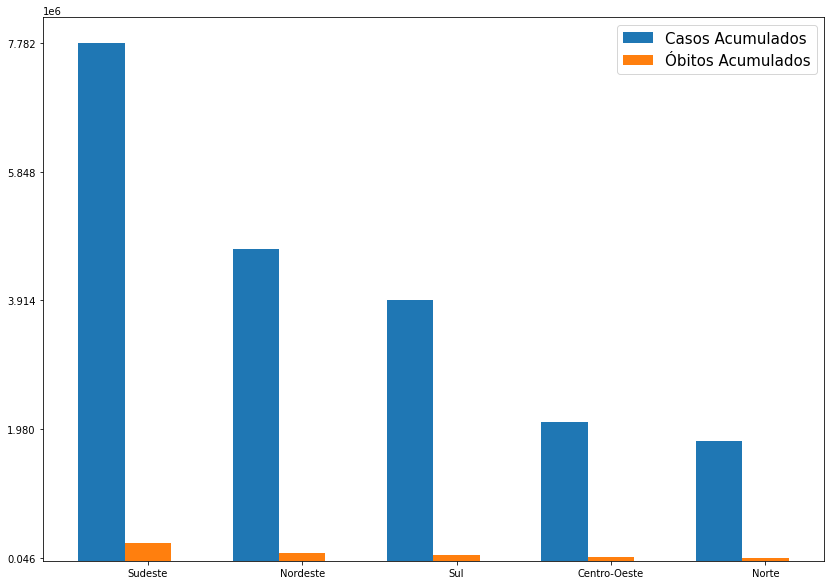

In [23]:
barWidth = 0.3

df_region_order = df_region.sort_values(by='Casos_Acumulados', ascending=False)

labels = [state for state in df_region_order['regiao']]
casos_acum = df_region_order['Casos_Acumulados']
obitos_acum = df_region_order['Obitos_Acumulados']

axis_y = np.linspace(min(obitos_acum), max(casos_acum), 5, endpoint=True)

r1 = np.arange(len(casos_acum))
r2 = [x+barWidth for x in r1]

plt.figure(figsize=(14,10))
plt.bar(r1, casos_acum, width=barWidth, label='Casos Acumulados')
plt.bar(r2, obitos_acum, width=barWidth, label='Óbitos Acumulados')

plt.xticks([r+barWidth for r in range(len(casos_acum))], labels);
plt.yticks(axis_y)

plt.legend(prop={'size': 15})
plt.show()

Aqui pode-se ressaltar que a região do Brasil que mais casos e óbitos é a Sudeste, pois ela engloba os 3 estados mais representativos nesses dois quesitos, que são SP, RJ e MG. Já em segundo temos a região Nordeste, a qual é uma das regiões que mais tem estados e que pelas nóticias não teve um respeito as medidas de controle impostas pelo estado.

In [24]:
(df_state.query('Regiao == "Sudeste"')).sort_values(by='Confirmados_Acumulado', ascending=False)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
25,SP,46289333,8.94,4138421,141664,0.31,3.21,8701,387,45393597,Sudeste,98.064919
10,MG,21292666,8.10,1724506,44068,0.21,2.56,10449,254,15678494,Sudeste,73.633306
18,RJ,17366189,6.15,1067809,60266,0.35,4.20,4037,130,13353460,Sudeste,76.893439
7,ES,4064052,13.51,548895,12019,0.30,2.19,789,13,3449606,Sudeste,84.880951


#### Taxa Letalidade

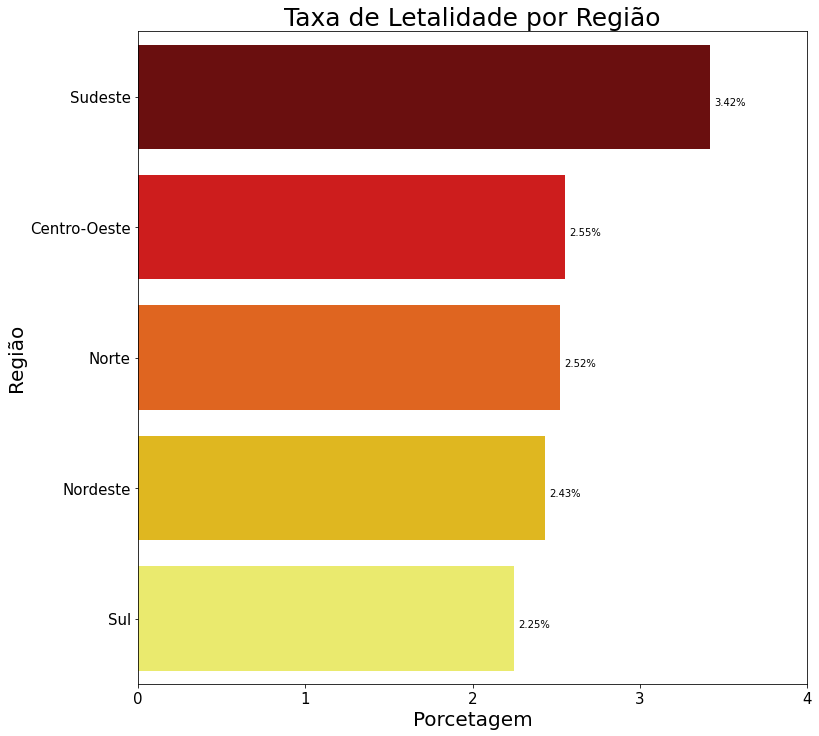

In [25]:
plt.figure(figsize=(12,12))
sns_t = sns.barplot(data=df_region.sort_values(by='Taxa_Letalidade', ascending=False), 
                    x='Taxa_Letalidade', y='regiao', palette='hot')

for p in sns_t.patches:
    width = p.get_width()
    plt.text(0.12+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

sns_t.axes.set_title("Taxa de Letalidade por Região",fontsize=25)
sns_t.set_xlabel("Porcetagem", size=20)
sns_t.set_ylabel("Região", size=20)
sns_t.set_xticks([0, 1, 2, 3, 4])
sns_t.tick_params(labelsize=15);

In [26]:
(df_state.query('Regiao == "Sudeste"')).sort_values(by='Taxa_Letalidade', ascending=False)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
18,RJ,17366189,6.15,1067809,60266,0.35,4.20,4037,130,13353460,Sudeste,76.893439
25,SP,46289333,8.94,4138421,141664,0.31,3.21,8701,387,45393597,Sudeste,98.064919
10,MG,21292666,8.10,1724506,44068,0.21,2.56,10449,254,15678494,Sudeste,73.633306
7,ES,4064052,13.51,548895,12019,0.30,2.19,789,13,3449606,Sudeste,84.880951


#### Taxa de Mortalidade

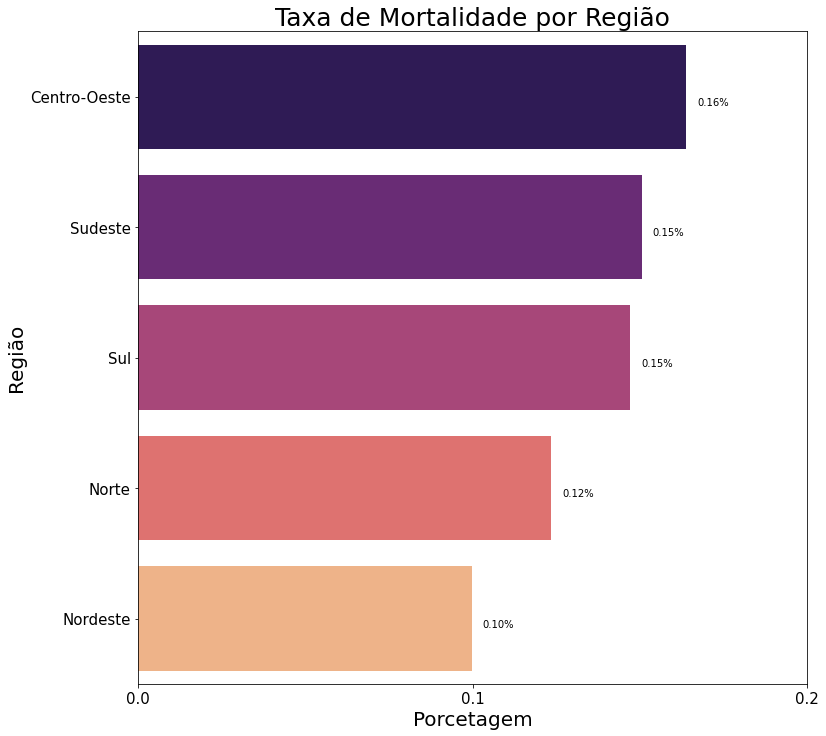

In [27]:
plt.figure(figsize=(12,12))
sns_t = sns.barplot(data=df_region.sort_values(by='Taxa_Mortalidade', ascending=False), 
                    x='Taxa_Mortalidade', y='regiao', palette='magma')

for p in sns_t.patches:
    width = p.get_width()
    plt.text(0.008+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

sns_t.axes.set_title("Taxa de Mortalidade por Região",fontsize=25)
sns_t.set_xlabel("Porcetagem", size=20)
sns_t.set_ylabel("Região", size=20)
sns_t.set_xticks([0, 0.1, 0.2])
sns_t.tick_params(labelsize=15);

A região teve a sua população mais afetada pelas mortes do Covid-19 foi a Centro-Oeste.

In [28]:
(df_state.query('Regiao == "Centro-Oeste"')).sort_values(by='Taxa_Mortalidade', ascending=False)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
12,MT,3526220,14.24,501972,13087,0.37,2.61,1432,31,2416608,Centro-Oeste,68.532536
6,DF,3055149,14.92,455682,9741,0.32,2.14,594,18,2285800,Centro-Oeste,74.817955
11,MS,2809394,12.83,360499,9082,0.32,2.52,703,8,2679330,Centro-Oeste,95.370389
8,GO,7113540,10.69,760663,21302,0.30,2.80,382,12,5044918,Centro-Oeste,70.919936


#### População Infectada

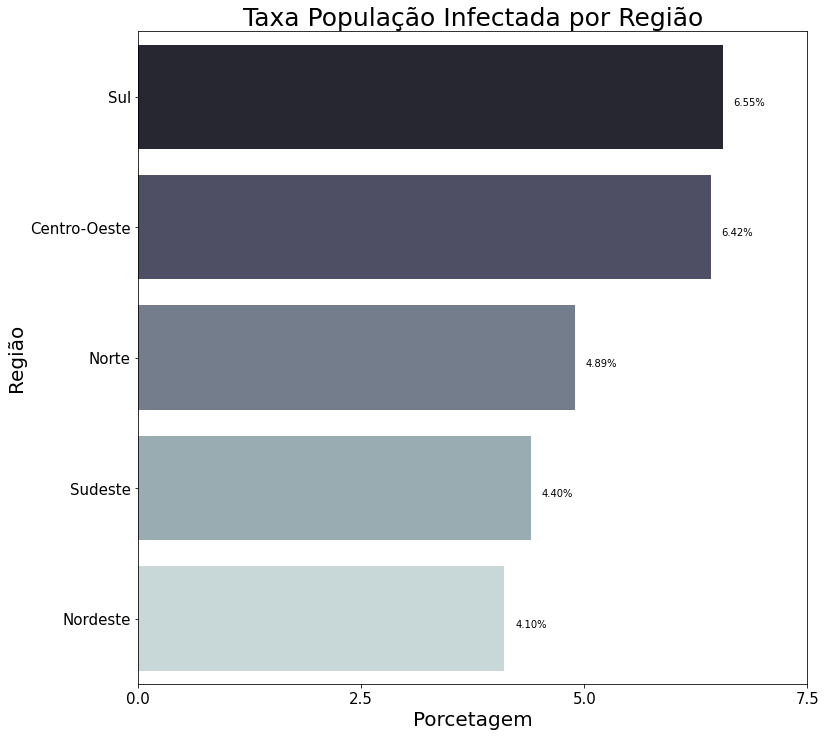

In [29]:
plt.figure(figsize=(12,12))
sns_t = sns.barplot(data=df_region.sort_values(by='Porcentagem_Populacao_Confirmado', ascending=False), 
                    x='Porcentagem_Populacao_Confirmado', y='regiao', palette='bone')

for p in sns_t.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

sns_t.axes.set_title("Taxa População Infectada por Região",fontsize=25)
sns_t.set_xlabel("Porcetagem", size=20)
sns_t.set_xticks([0.0, 2.5, 5.0, 7.5])
sns_t.set_ylabel("Região", size=20)
sns_t.tick_params(labelsize=15);

In [30]:
(df_state.query('Regiao == "Sul"')).sort_values(by='Porcentagem_Populacao_Confirmado', ascending=False)

,state,Populacao_Estimada,Porcentagem_Populacao_Confirmado,Confirmados_Acumulado,Obitos_Acumulados,Taxa_Mortalidade,Taxa_Letalidade,Confirmacao_Dia,Obitos_Dia,Vacinados_Totais,Regiao,Porcentagem_Vacinados
23,SC,7252502,15.53,1126670,18245,0.25,1.62,2038,41,5786439,Sul,79.785418
17,PR,11516840,12.24,1409308,36164,0.31,2.57,2287,99,9570085,Sul,83.096448
22,RS,11422973,12.10,1381971,33588,0.29,2.43,1030,21,10564114,Sul,92.481301


#### Vacinas

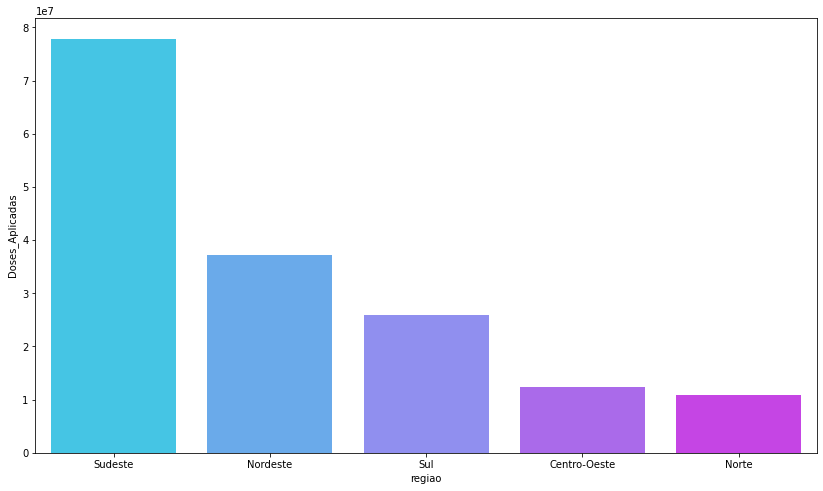

In [31]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_region.sort_values(by='Doses_Aplicadas', ascending=False), 
            x='regiao', y='Doses_Aplicadas', palette='cool');

Com isso podemos destacar que a distruição das Doses Aplicadas está bem condizente com os dados de Casos/Óbitos das regiões, o que é algo bem positivo, pois o problema está sendo combatido de uma forma adequada focando os pontos principais

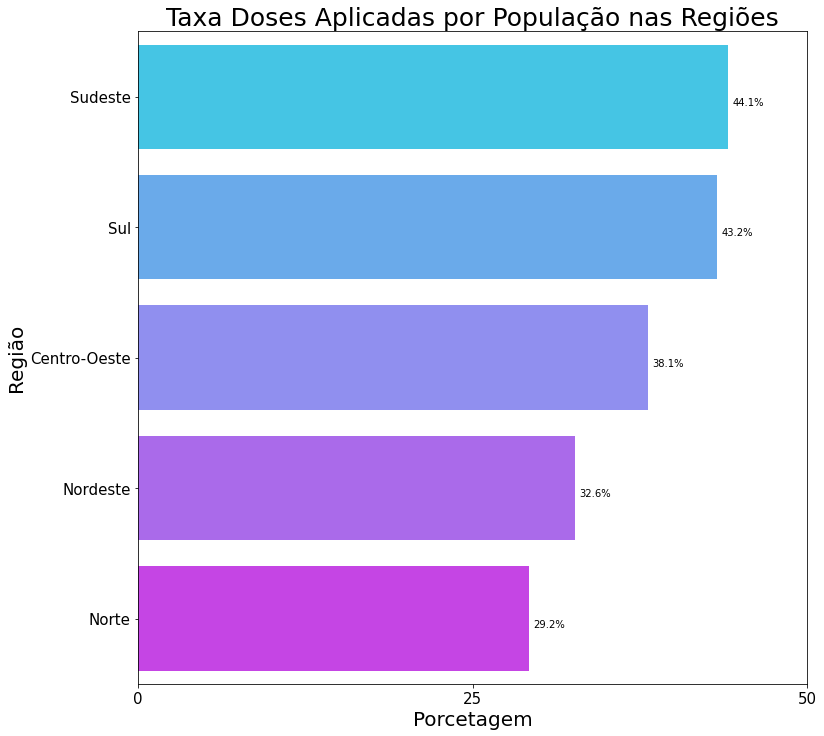

In [32]:
plt.figure(figsize=(12,12))
sns_t = sns.barplot(data=df_region.sort_values(by='Porcentagem_Doses_Aplicadas', ascending=False), 
                    x='Porcentagem_Doses_Aplicadas', y='regiao', palette='cool')

for p in sns_t.patches:
    width = p.get_width()
    plt.text(1.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.1f}%'.format(width),
             ha='center', va='center')

sns_t.axes.set_title("Taxa Doses Aplicadas por População nas Regiões",fontsize=25)
sns_t.set_xlabel("Porcetagem", size=20)
sns_t.set_xticks([0, 25, 50])
sns_t.set_ylabel("Região", size=20);
sns_t.tick_params(labelsize=15)

Um fato interessante de se destacar aqui é que apesar de termos o Nordeste como o segundo colocado em Doses Aplicadas, uma porcentagem menor da população imunizada. O foco ainda segue sendo na região Sudeste.

### Dados do Mundo

In [ ]:
df_world_top5 = df_world[:5]
columns = df_world_top5.columns[1:]

for col in columns:
  new_values = []
  for num in df_world_top5[col]:
    if type(num) is str:
      n = num.replace(',', '')
      n = int(n)
      new_values.append(n)
  if len(new_values) != 0:
    df_world_top5[col] = new_values

df_world_top5['Taxa_Letalidade'] = (df_world_top5.Obitos/df_world_top5.Confirmadors)*100
df_world_top5['Taxa_Mortalidade'] = (df_world_top5.Obitos/df_world_top5.Populacao)*100

In [34]:
df_world_top5

,Pais,Confirmadors,Novos_Confirmados,Obitos,Novos_Obitos,Recuperados,Novos_Recuperados,Casos_Ativos,Total_Testes,Populacao,Taxa_Letalidade,Taxa_Mortalidade
0,USA,37886998,131138,640073,855,30289281,55367,6957644,559519820,333188423,1.689427,0.192105
1,India,32285101,35201,432552,440,31478405,37145,374144,496629524,1395272151,1.339788,0.031001
2,Brazil,20417204,38218,570718,1137,19313546,57619,532940,56023684,214260563,2.795280,0.266366
3,Russia,6642559,20958,172110,805,5918324,18407,552125,172800000,146004991,2.591020,0.117880
4,France,6504978,28114,112864,111,5941296,27837,450818,111773788,65436259,1.735040,0.172479


In [35]:
df_world_top5.sort_values(by='Taxa_Letalidade', ascending=False)

,Pais,Confirmadors,Novos_Confirmados,Obitos,Novos_Obitos,Recuperados,Novos_Recuperados,Casos_Ativos,Total_Testes,Populacao,Taxa_Letalidade,Taxa_Mortalidade
2,Brazil,20417204,38218,570718,1137,19313546,57619,532940,56023684,214260563,2.795280,0.266366
3,Russia,6642559,20958,172110,805,5918324,18407,552125,172800000,146004991,2.591020,0.117880
4,France,6504978,28114,112864,111,5941296,27837,450818,111773788,65436259,1.735040,0.172479
0,USA,37886998,131138,640073,855,30289281,55367,6957644,559519820,333188423,1.689427,0.192105
1,India,32285101,35201,432552,440,31478405,37145,374144,496629524,1395272151,1.339788,0.031001


Em comparação aos dados dos 5 países com mais Casos Confirmados, o Brasil apresenta os piores indicadores dentre todos, a Letalidade é maior, a Mortalidade é maior, os Testes são menores. Nos óbitos ele só perde para os USA, porém, temos uma diferença de 17 milhões de casos, para uma diferença de apenas 69 mil óbitos, o que é algo bem alarmante.